# Welcome to the **kids** triage game
In this game, you'll get a case of a kid who doesn't want to go to school. Your task is to find out if they are actually sick or not. You'll get either an image (if they think they have a broken arm) or health data (like temperature...etc)

⚽️⚽️ The more kids you classify correctly -> the more point you get

[Image](https://drive.google.com/uc?id=1zJB5PrWiKvqUd-khXmkL_7IpLgnQU1ah)

**Lets write together**

# Install and imports

In [1]:
# install gdown to download the data
!pip install gdown

# Downloade the data
!gdown https://drive.google.com/uc?id=1Dm5FHRIJEblaB5U0aQxJwJuhVOZBWaGT

# unzip the data ---> important to learn
!unzip -q kids_imgs.zip

Downloading...
From: https://drive.google.com/uc?id=1Dm5FHRIJEblaB5U0aQxJwJuhVOZBWaGT
To: /kaggle/working/kids_imgs.zip
100%|███████████████████████████████████████| 1.94M/1.94M [00:00<00:00, 138MB/s]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

from pprint import pprint
from PIL import Image
from tqdm import tqdm
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
import seaborn as sns

# Loaders

Number of images: 4


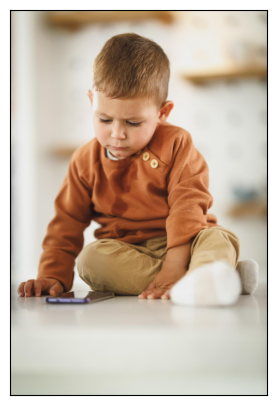

In [3]:
class ImgLoader:
  def __init__(self, path):
    self.path = path
    self._number_of_imgs_ = len(os.listdir(self.path))

  def __len__(self):
    return self._number_of_imgs_

  def __getitem__(self, idx):
    img_name = os.listdir(self.path)[idx]
    img = plt.imread(os.path.join(self.path, img_name))
    return img

def plot(img):
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.imshow(img)
  ax.axes.get_xaxis().set_ticks([])
  ax.axes.get_yaxis().set_ticks([])
  fig.show()


# Test
img_loader = ImgLoader("kids_imgs/imgs")
print(f"Number of images: {len(img_loader)}")

# plot to test
img = img_loader[0]
plot(img)

In [4]:
# Lets cheat and write the other kids in the code

class HealthLoader:
  def __init__(self):
    self.data = [
        {
            "temp_c": 40,
            "can_see": True,
            "can_hear": True,
            "is_bleeding": False
        },
        {
            "temp_c": 37,
            "can_see": True,
            "can_hear": True,
            "is_bleeding": True
        },
        {
            "temp_c": 37.3,
            "can_see": True,
            "can_hear": True,
            "is_bleeding": False
        },
        {
            "temp_c": 36.9,
            "can_see": True,
            "can_hear": True,
            "is_bleeding": False
        },
    ]

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx]


# Test
health_loader = HealthLoader()
print(f"Number of kids: {len(health_loader)}")
print(f"First kid:")
pprint(health_loader[0])

Number of kids: 4
First kid:
{'can_hear': True, 'can_see': True, 'is_bleeding': False, 'temp_c': 40}


In [5]:
class DataLoader:
  def __init__(self, imgs_path):
    self.img_loader = ImgLoader(imgs_path)
    self.health_loader = HealthLoader()

  def __len__(self):
    return len(self.img_loader)+len(self.health_loader)

  def __getitem__(self, idx):
    if idx < len(self.img_loader):
      return self.img_loader[idx]
    else:
      return self.health_loader[idx-len(self.img_loader)]



# Test
data_loader = DataLoader("kids_imgs/imgs")
print(f"Number of kids: {len(data_loader)}")


assert len(data_loader) == len(img_loader)+len(health_loader)

Number of kids: 8


# 👉👉 Game play now

  0%|          | 0/8 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

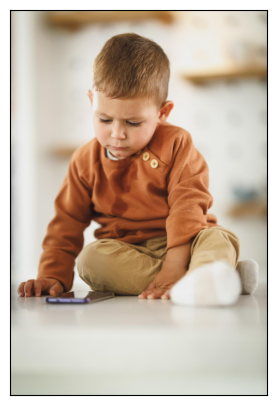

In [ ]:
data = DataLoader("kids_imgs/imgs")
classifications = []

for kid_triaging in tqdm(range(len(data))):
  kid = data[kid_triaging]
  if type(kid) == np.ndarray:
    # plot(kid)
    plt.figure()
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(kid)
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])

    plt.show()

  else:
    print("Kid has following symptoms")
    pprint(kid)

  is_sick = input("Is the kid sick? (y/n)")
  if is_sick == "y":
    classifications.append(1)
  else:
    classifications.append(0)

with open("classifications.txt", "w") as f:
  f.write("\n".join([str(c) for c in classifications]))





# My score

In [ ]:
def load_classification():
  with open('classifications.txt', 'r') as f:
    lines = f.readlines()

  for idx, line in enumerate(lines):
    lines[idx] = bool(int(line.strip()))

  return lines

classifications = load_classification()
classifications

[True, True, True, False, True, True, False, False]

In [ ]:
def load_labels():
  with open('kids_imgs/labels', 'r') as f:
    lines = f.readlines()

  for idx, line in enumerate(lines):
    lines[idx] = bool(int(line.strip()))

  return lines


labels = load_labels()
labels

[True, True, True, False, True, True, False, False]

In [ ]:
def accuracy(classifications, labels):
  assert len(classifications) == len(labels)
  correct = 0
  for c, l in zip(classifications, labels):
    if c == l:
      correct += 1

  return correct/len(classifications)

accuracy(classifications, labels)

1.0

In [ ]:
# Convert boolean lists to numpy arrays if necessary
classifications = np.array(classifications)
labels = np.array(labels)


f1 = f1_score(labels, classifications)
conf_matrix = confusion_matrix(labels, classifications)
precision = precision_score(labels, classifications)
recall = recall_score(labels, classifications)
accuracy = accuracy_score(labels, classifications)

print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")


F1 Score: 1.0
Confusion Matrix:
[[3 0]
 [0 5]]
Precision: 1.0
Recall: 1.0
Accuracy: 1.0


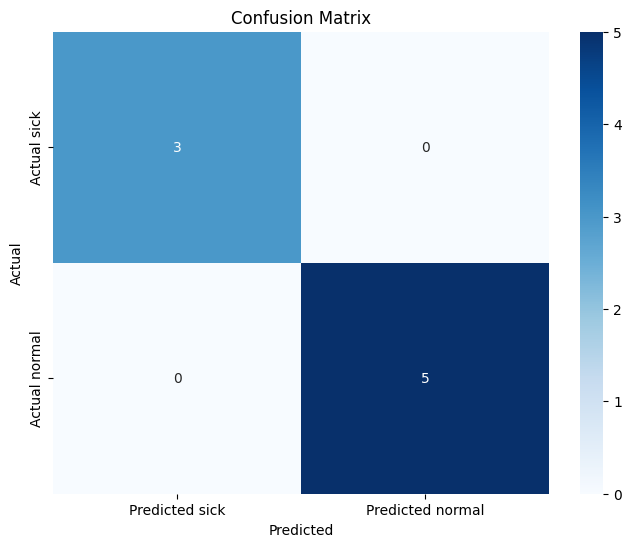

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted sick", "Predicted normal"],
            yticklabels=["Actual sick", "Actual normal"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


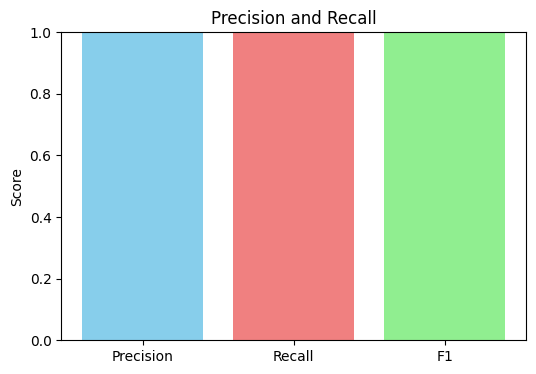

In [ ]:
# Data for the bar plot
metrics = ['Precision', 'Recall', "F1"]
scores = [precision, recall, f1]

# Create the bar plot
plt.figure(figsize=(6, 4))
plt.bar(metrics, scores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for percentages
plt.ylabel('Score')
plt.title('Precision and Recall')
plt.show()
